In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv("data.csv", low_memory=False,parse_dates=['report_date'])
data.head()
data['report_date']=pd.to_datetime(data['report_date'], errors='coerce')
data.head()

,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,NaN,NaN,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,NaN,NaN,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,NaN,NaN,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,NaN,NaN,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,NaN,NaN,127,cases


# show data field code 'AR0005' values for 'Argentina-Catamarca' for entire duration

In [4]:
query=data.query("data_field_code=='AR0005' & location=='Argentina-Catamarca' ")
query[['value']]=pd.to_numeric(query.value)


C:\Users\Ravneet\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Ravneet\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


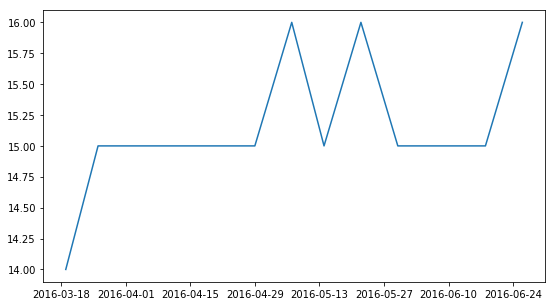

In [6]:
plt.figure(figsize=(9,5))
plt.plot(query['report_date'],query['value'])

#  Plot 'Argentina-CABA' and 'Argentina-Catamarca' for number of cases values for entire duration to identify the difference.

C:\Users\Ravneet\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ravneet\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\Ravneet\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

<Container object of 14 artists>

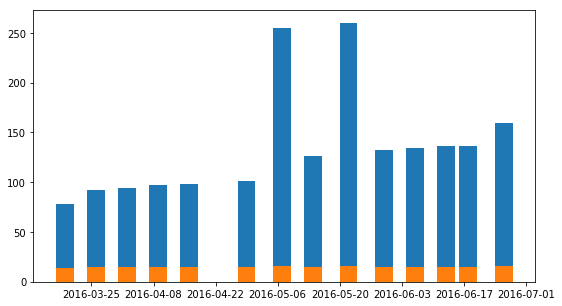

In [7]:
plt.figure(figsize=(9,5))
query1=data.query("location=='Argentina-CABA' & unit=='cases' ")
query1[['value']]=pd.to_numeric(query1.value)
df1=query1.groupby(['report_date'],as_index=False).sum()

query1=data.query("location=='Argentina-Catamarca' & unit=='cases' ")
query1[['value']]=pd.to_numeric(query1.value)
df2=query1.groupby(['report_date'],as_index=False).sum()

plt.bar(df1['report_date'],df1['value'],width=4)
plt.bar(df2['report_date'],df2['value'],width=4)

# Plot how data field values are distributed across the locations 'Argentina-Buenos_Aires', 'Argentina-CABA', 'Argentina-Catamarca'

In [8]:
data.head()

,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,NaN,NaN,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,NaN,NaN,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,NaN,NaN,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,NaN,NaN,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,NaN,NaN,127,cases


In [31]:
query=data.query("location=='Argentina-Buenos_Aires' | location=='Argentina-CABA' | location=='Argentina-Catamarca' ")
query[['value']]=pd.to_numeric(query['value'])
newData=query.groupby(['data_field','location'],as_index=False)['value'].sum()
# newData = newData[newData['value'] != 0]
l = list(newData.data_field.unique())
newData.set_index('data_field',inplace=True)
newData

C:\Users\Ravneet\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Ravneet\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,location,value
data_field,,
cumulative_cases_discarded,Argentina-Buenos_Aires,251
cumulative_cases_discarded,Argentina-CABA,27
cumulative_cases_discarded,Argentina-Catamarca,0
cumulative_cases_under_study,Argentina-Buenos_Aires,2981
cumulative_cases_under_study,Argentina-CABA,1748
cumulative_cases_under_study,Argentina-Catamarca,212
cumulative_confirmed_imported_cases,Argentina-Buenos_Aires,32
cumulative_confirmed_imported_cases,Argentina-CABA,124
cumulative_confirmed_imported_cases,Argentina-Catamarca,0


In [22]:
newData.loc[l[1]]['value']

data_field
cumulative_cases_under_study    2981
cumulative_cases_under_study    1748
cumulative_cases_under_study     212
Name: value, dtype: int64

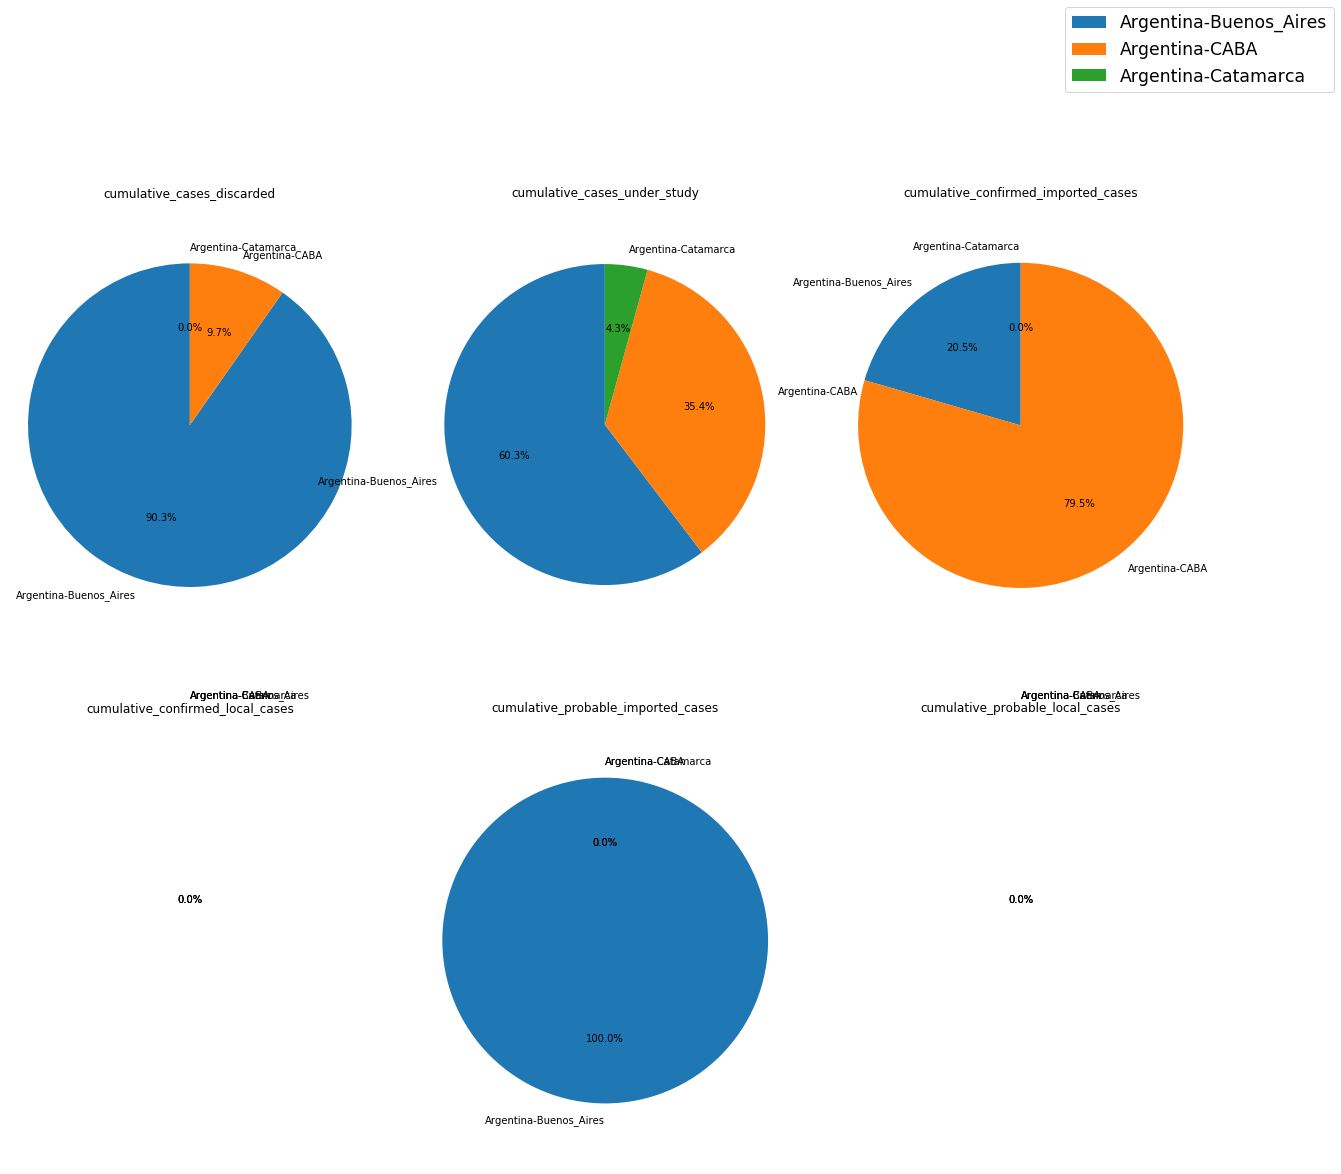

In [60]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(18,15))
k=0
for i in range(2):
    for j in range(3):
        temp=newData.loc[l[k]]
        axes[i][j].pie(temp['value'],labels=temp['location'],autopct="%1.1f%%", startangle=90)
        axes[i][j].title.set_text(l[k])
        axes[i][j].axis('equal')
        k+=1
plt.legend(loc='center',bbox_to_anchor=(1.0,2.5) ,fontsize='xx-large')
plt.tight_layout(pad=5)

C:\Users\Ravneet\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ravneet\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

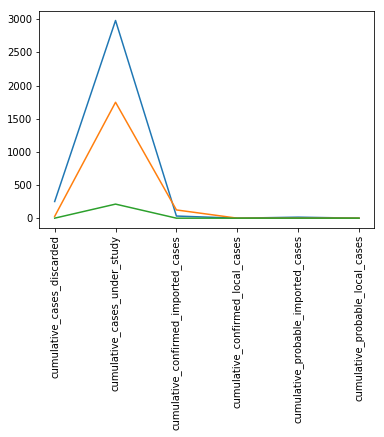

In [339]:
query=data.query("location=='Argentina-Buenos_Aires' | location=='Argentina-CABA' | location=='Argentina-Catamarca' ")
query[['value']]=pd.to_numeric(query['value'])
newData=query.groupby(['location','data_field'],as_index=False)['value'].sum()
newData.set_index('location',inplace=True)

plt.plot(newData.loc['Argentina-Buenos_Aires']['data_field'],newData.loc['Argentina-Buenos_Aires']['value'])
plt.plot(newData.loc['Argentina-CABA']['data_field'],newData.loc['Argentina-CABA']['value'])
plt.plot(newData.loc['Argentina-Catamarca']['data_field'],newData.loc['Argentina-Catamarca']['value'])
plt.xticks(rotation='vertical')


# spell checker program


In [1]:
from difflib import get_close_matches
import re

def words(text):
    return re.findall(r'\w+', text.lower())

wordSet = set(words(open('big.txt').read()))
# print(wordList)

while(True):
    str1 = input('Enter a Word:')
    correction = get_close_matches(str1, wordSet, n=10,cutoff=0.7)
    if str1=='exit' or str1=='Exit':
        break
    elif correction[0] == str1:
        print('Your word is correct!')
    else:
        print('Did you mean: {}'.format(correction))

Enter a Word:goof
Did you mean: ['woof', 'roof', 'hoof', 'goot', 'good', 'golf']
Enter a Word:woof
Your word is correct!
Enter a Word:exit
